In [68]:
import pandas as pd
import csv

In [46]:
#import data
df = pd.read_csv('../Desktop/routes.dat', header = None)
df

,0,1,2,3,4,5,6,7,8
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


In [47]:
#get only the airport code
df = df[[df.columns[2],df.columns[4]]]
df.describe()


,2,4
count,67663,67663
unique,3409,3418
top,ATL,ATL
freq,915,911


In [48]:
#extract unique edges
df['count'] = 1
df = df.groupby(list(df.columns[:2]),as_index =False).sum()[df.columns[:2]]
df

C:\Users\benni\AppData\Local\Temp\ipykernel_32840\2671258578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count'] = 1


,2,4
0,AAE,ALG
1,AAE,CDG
2,AAE,IST
3,AAE,LYS
4,AAE,MRS
...,...,...
37590,ZYI,SZX
37591,ZYI,WUH
37592,ZYI,XIY
37593,ZYI,XMN


In [49]:
#how sparse, dense is our graph?
df.groupby(df.columns[0], as_index =False).count().describe()

,4
count,3409.000000
mean,11.028161
std,24.253474
min,1.000000
25%,1.000000
50%,3.000000
75%,8.000000
max,239.000000


total number of edges: 37595
expected maximum number of edges: 5812345.0
greater than 50: 182
greater than 100: 64
greater than 150: 22
greater than 200: 7


array([[<AxesSubplot:title={'center':'4'}>]], dtype=object)

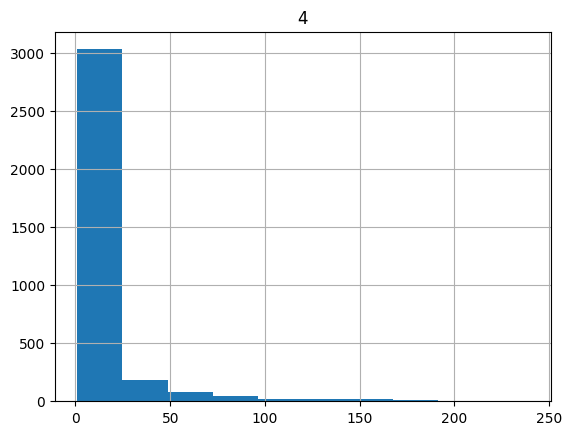

In [50]:
#visualization of how sparse, dense is our graph. our graph is sparse enough.
histogram = df.groupby(df.columns[0], as_index =False).count()
print(f"total number of edges: {histogram[histogram.columns[1]].sum()}" )
print(f"expected maximum number of edges: {histogram[histogram.columns[0]].count()*(histogram[histogram.columns[0]].count()+1)/2}")
print(f"greater than 50: {len(histogram.loc[histogram[histogram.columns[1]] > 50])}" )
print(f"greater than 100: {len(histogram.loc[histogram[histogram.columns[1]] > 100])}" )
print(f"greater than 150: {len(histogram.loc[histogram[histogram.columns[1]] > 150])}" )
print(f"greater than 200: {len(histogram.loc[histogram[histogram.columns[1]] > 200])}" )
histogram.hist(df.columns[1])

In [51]:
#make a hashmap: {key = airports, value=integer}
airports = {}
time = 0
for airport in (list(df[2].unique())+list(df[4].unique())):
    if(airports.get(airport, -1) == -1):
        airports[airport] = time
        time += 1

In [52]:
#convert hashmap into a dataframe table
data = []
for x,y in airports.items():
    data.append({'airport':x, 'code':y})

In [53]:
#export the hashmap into csv file
db = pd.DataFrame(data, columns = ['airport', 'code'])
db.to_csv('../Downloads/airportcode.csv',header=False, index = False )

In [54]:
#concatenate airport name with hashmap values
df = df.rename(columns = {2: '2', 4 : '4'})
df = df.merge(db,left_on = '2', right_on = 'airport')
df = df.merge(db,left_on = '4', right_on = 'airport')
df

,2,4,airport_x,code_x,airport_y,code_y
0,AAE,ALG,AAE,0,ALG,100
1,ABJ,ALG,ABJ,13,ALG,100
2,ALC,ALG,ALC,98,ALG,100
3,AMM,ALG,AMM,108,ALG,100
4,AZR,ALG,AZR,206,ALG,100
...,...,...,...,...,...,...
37590,ZAG,BWK,ZAG,3363,BWK,414
37591,ZAM,JOL,ZAM,3366,JOL,1326
37592,ZEL,YKT,ZEL,3375,YKT,3233
37593,ZIG,CSK,ZIG,3383,CSK,588


In [55]:
#edges we are interested in integer code
df[['code_x', 'code_y']]

,code_x,code_y
0,0,100
1,13,100
2,98,100
3,108,100
4,206,100
...,...,...
37590,3363,414
37591,3366,1326
37592,3375,3233
37593,3383,588


In [62]:
#create adjacency list
adjacency_list = {}
for i in range(len(df)):
    x, y  = df[['code_x', 'code_y']].iloc[i]
    adjacency_list[x] = adjacency_list.get(x, []) +[y]
adjacency_list

{0: [100, 461, 1243, 1726, 1890, 2122, 2125],
 13: [100,
  461,
  1243,
  2125,
  1663,
  25,
  301,
  347,
  370,
  532,
  550,
  564,
  686,
  687,
  874,
  1576,
  1605,
  1972,
  2140,
  2443,
  2902],
 98: [100,
  2122,
  2125,
  110,
  145,
  222,
  313,
  572,
  1614,
  2129,
  2253,
  2686,
  698,
  1,
  988,
  2666,
  370,
  884,
  258,
  276,
  369,
  730,
  792,
  1565,
  1692,
  1739,
  1976,
  848,
  1733,
  251,
  261,
  282,
  312,
  314,
  340,
  361,
  404,
  490,
  582,
  734,
  760,
  773,
  857,
  962,
  1044,
  1076,
  1664,
  1668,
  1919,
  2015,
  2030,
  2121,
  2220,
  2509,
  2618,
  2667,
  2917,
  3397,
  2631,
  378,
  1063,
  2865,
  614,
  832,
  871,
  1009,
  1023,
  1048,
  1170,
  1480,
  2044,
  2059,
  2465,
  2480,
  2530,
  2832,
  2867,
  3064,
  3113,
  50,
  824,
  1386,
  1423,
  1486,
  1491,
  1511,
  1518,
  1866,
  1905,
  2142,
  2769,
  2813,
  2853,
  2964,
  3074,
  3099],
 108: [100,
  461,
  1243,
  110,
  222,
  698,
  2487,
  1663

In [73]:
#save adjacency list as a csvfile
with open('../Downloads/adjacency_list.csv', 'w',newline='') as f:
    writer = csv.writer(f, delimiter = ',')
    for x,y in adjacency_list.items():
        writer.writerow([x]+y)

    

In [76]:
#save edges into csv file
df[['code_x', 'code_y']].to_csv('edges.csv',header=False, index = False )